# Alignment and fPCA 

## Prepare data

In [127]:
times <- unique(printer_smooth$spectra)

In [128]:
length(times)

[1] 75

In [129]:
sim_matrix <- printer_smooth %>%
  mutate(
    printer = as.factor(printer),
    replicate = as.factor(replicate),
    curve_id = paste0("P", printer, "_R", replicate)
  ) %>%
  arrange(curve_id, spectra) %>%
  select(spectra, curve_id, intensity_smooth) %>%
  pivot_wider(
    names_from = curve_id,
    values_from = intensity_smooth
  ) %>%
  arrange(spectra) %>%
  select(-spectra) %>%
  as.matrix()

In [130]:
# Check matrix
cat("Matrix size (printers × time):", dim(sim_matrix), "\n")

Matrix size (printers × time): 75 700 


In [131]:
print(typeof(sim_matrix))

[1] "double"


In [132]:
head(sim_matrix[, 1:6])

P100_R1,P100_R2,P100_R3,P100_R4,P100_R5,P100_R6
4291.219,4318.100,4224.272,4235.357,4217.156,4327.195
8322.060,8205.735,8143.317,8168.844,8182.780,8315.421
22840.756,22069.640,22277.582,22326.049,22453.866,22554.034
62492.053,59502.644,60968.095,60964.324,61194.089,61027.070
162660.779,153145.418,158849.832,158419.849,157870.519,157288.511
401194.158,374456.104,391698.899,389505.215,384475.187,384811.468


In [133]:
transformed_jfpca <-
  prep_training_data(
    f = sim_matrix,
    time = times, 
    fpca_method = "jfpca", # jfPCA
    optim_method = "DPo" # Optimization algorithm
  )

ℹ Using lambda = 0

ℹ Initializing...

ℹ Computing Karcher mean of 700 functions in SRSF space...

ℹ Entering iteration 1...



In [134]:
print(length(transformed_jfpca))
print(names(transformed_jfpca))
cat("Has fpca_res:", "fpca_res" %in% names(transformed_jfpca), "\n")

[1] 3
[1] "alignment" "fpca_type" "fpca_res" 
Has fpca_res: TRUE 


## Plotting

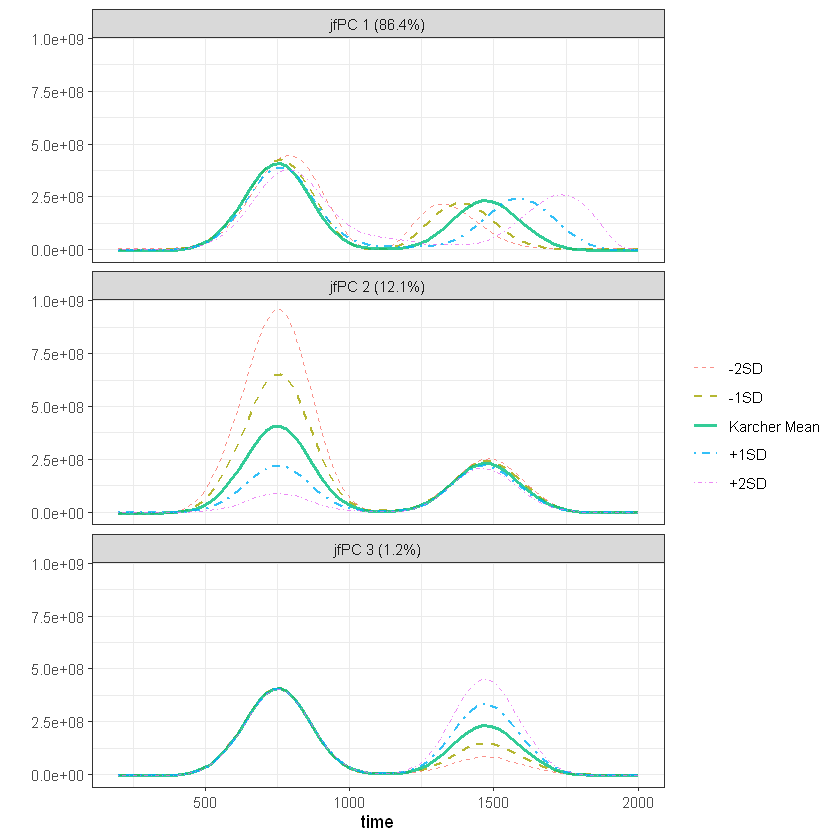

In [137]:
# Plot first 3 joint functional principal components
plot_pc_directions(
  fpcs = 1:3,                    # Plot PC 1 to 3
  fdasrvf = transformed_jfpca$fpca_res,  # FPCA results from training
  fpca_method = "jfpca",         # Joint functional PCA method
  times = times,                 # Time vector for x-axis
  digits = 1,                    # Round variance % to 1 decimal
  nrow = 3,                      # Arrange in 3 rows (one PC per row)
  alpha = 0.8,                   # Line transparency
  linesizes = c(0.5, 0.7, 1.0, 0.7, 0.5)  # Line widths: thin-thick-thin pattern
)

Ignoring unknown labels:
• linewidth : ""


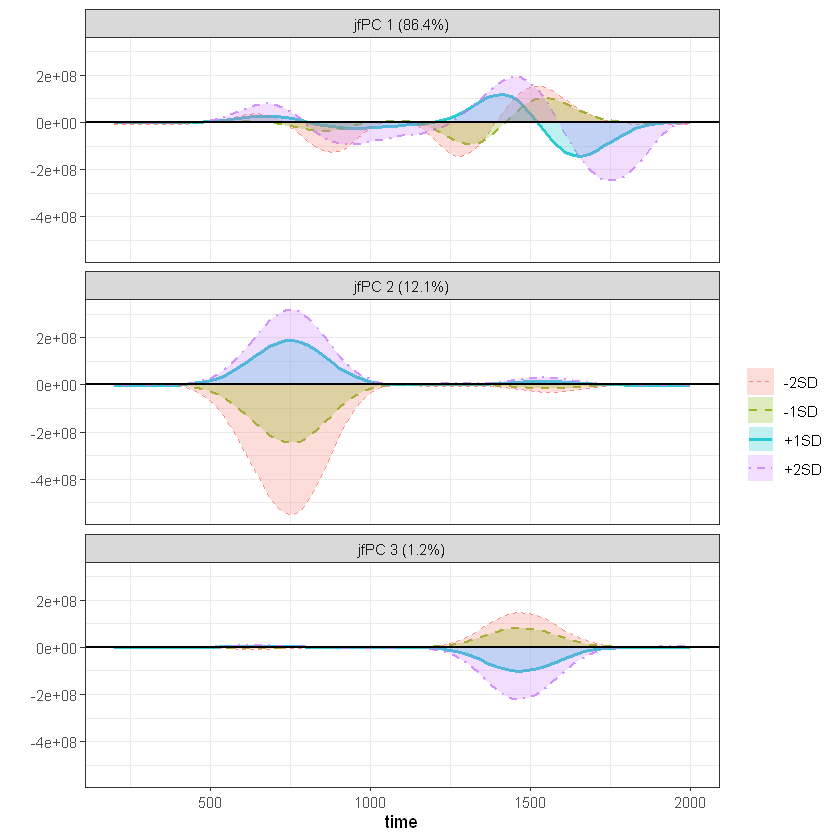

In [140]:
# Plot the differences between jfPCs and the Karcher Mean
plot_pc_diffs(
  fpcs = 1:3,                                   # Plot the first 3 principal components
  fdasrvf = transformed_jfpca$fpca_res,         # FPCA results from the training step
  fpca_method = "jfpca",                        # Use the Joint fPCA method
  times = times,                                # Time (or wavenumber) axis
  digits = 1,                                   # Round the explained variance to 1 decimal place
  nrow = 3,                                     # Arrange 1 PC per row
  alpha = 0.8,                                  # Line transparency
  alpha_fill = 0.25,                            # Transparency level for the filled ribbons
  linesizes = c(0.5, 0.7, 1.0, 0.7, 0.5),       # Line thickness pattern (thin–thick–thin)
  mean_linesize = 0.7,                          # Line width for the zero (mean) reference line
  linetype = TRUE,                              # Use dashed lines for ±SD curves
  freey = FALSE                                 # Keep a fixed y-axis scale across all facets
)